/var/folders/31/nj5p89nx2gg_nrh13dqr10y80000gn/T/ipykernel_2950/3785321436.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')


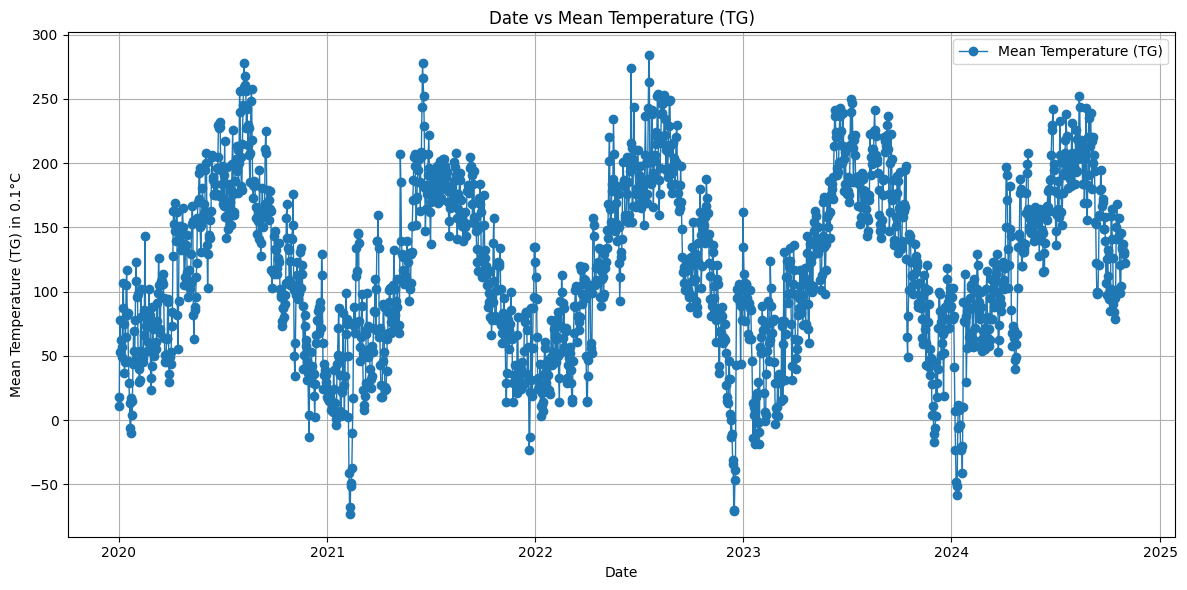

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'TG_SOUID121044.txt'

# Step 1: Read the file and identify data start index
with open(file_path, 'r') as file:
    lines = file.readlines()

data_start_index = next(i for i, line in enumerate(lines) if "SOUID" in line and "DATE" in line)

# Step 2: Clean and parse data
# Extracting only the data portion
data_lines = lines[data_start_index + 1:]

# Cleaning and organizing data
cleaned_data = []
for line in data_lines:
    # Split by commas and strip whitespace
    cleaned_line = [item.strip() for item in line.split(',')]
    # Append cleaned data if it matches the expected structure
    if len(cleaned_line) == 4:
        cleaned_data.append(cleaned_line)

# Creating a DataFrame from the cleaned data
columns = ["SOUID", "DATE", "TG", "Q_TG"]
data_df = pd.DataFrame(cleaned_data, columns=columns)

# Converting data types where necessary
data_df["TG"] = pd.to_numeric(data_df["TG"], errors='coerce')
data_df["Q_TG"] = pd.to_numeric(data_df["Q_TG"], errors='coerce')

# Step 3: Filter out rows where Q_TG equals 9
filtered_data = data_df[data_df["Q_TG"] != 9]

# Step 4: Filter data for entries after 2020
filtered_data_after_2020 = filtered_data[filtered_data["DATE"].astype(int) > 20200000]
filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')

# Step 5: Plot Date vs TG
plt.figure(figsize=(12, 6))
plt.plot(filtered_data_after_2020["DATE"], filtered_data_after_2020["TG"], label='Mean Temperature (TG)', marker='o', linestyle='-', linewidth=1)
plt.title('Date vs Mean Temperature (TG)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (TG) in 0.1°C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/31/nj5p89nx2gg_nrh13dqr10y80000gn/T/ipykernel_2950/2411861570.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')


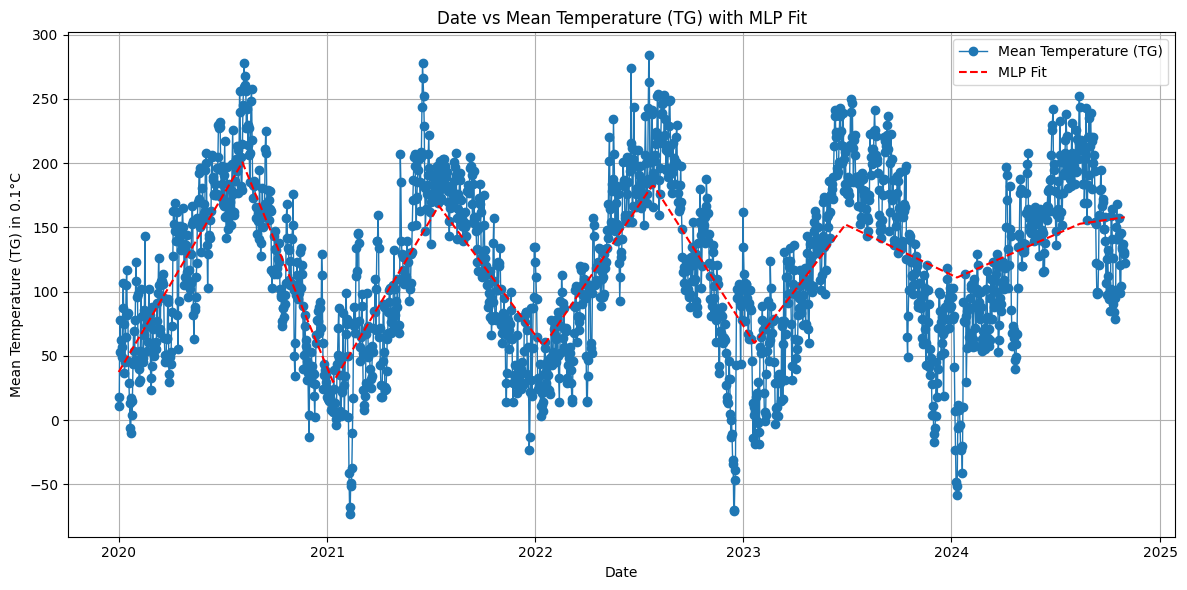

In [4]:
# Cell 1: Load Dataset and Read File
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

file_path = 'TG_SOUID121044.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

# Cell 2: Identify Data Start Index
data_start_index = next(i for i, line in enumerate(lines) if "SOUID" in line and "DATE" in line)

# Cell 3: Data Cleaning and Parsing
# Extracting only the data portion
data_lines = lines[data_start_index + 1:]

cleaned_data = []
for line in data_lines:
    # Split by commas and strip whitespace
    cleaned_line = [item.strip() for item in line.split(',')]
    # Append cleaned data if it matches the expected structure
    if len(cleaned_line) == 4:
        cleaned_data.append(cleaned_line)

columns = ["SOUID", "DATE", "TG", "Q_TG"]
data_df = pd.DataFrame(cleaned_data, columns=columns)

# Converting data types where necessary
data_df["TG"] = pd.to_numeric(data_df["TG"], errors='coerce')
data_df["Q_TG"] = pd.to_numeric(data_df["Q_TG"], errors='coerce')

# Cell 4: Data Filtering
filtered_data = data_df[data_df["Q_TG"] != 9]
filtered_data_after_2020 = filtered_data[filtered_data["DATE"].astype(int) > 20200000]
filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')

# Cell 5: Prepare Data for MLP Fitting
X = (filtered_data_after_2020["DATE"] - pd.Timestamp("2020-01-01")).dt.days.values.reshape(-1, 1)
y = filtered_data_after_2020["TG"].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000, random_state=42)
mlp.fit(X_scaled, y_scaled)

y_pred_scaled = mlp.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Cell 6: Visualization
plt.figure(figsize=(12, 6))
plt.plot(filtered_data_after_2020["DATE"], filtered_data_after_2020["TG"], label='Mean Temperature (TG)', marker='o', linestyle='-', linewidth=1)
plt.plot(filtered_data_after_2020["DATE"], y_pred, label='MLP Fit', color='red', linestyle='--')
plt.title('Date vs Mean Temperature (TG) with MLP Fit')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (TG) in 0.1°C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


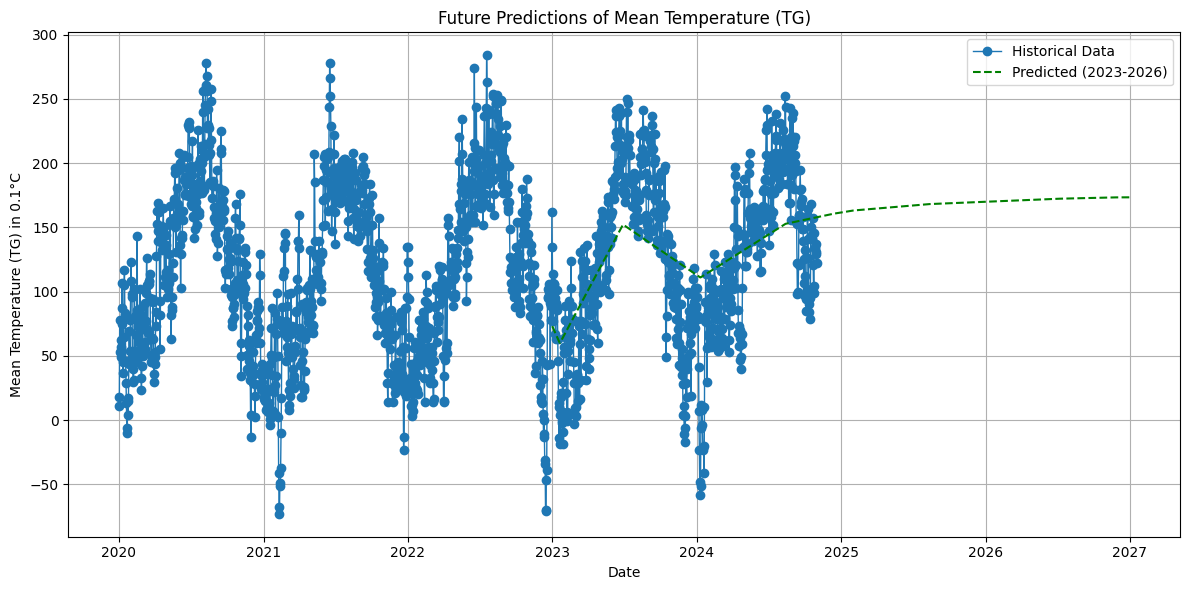

In [5]:
# Cell 7: Predict Future Values (Up to 2026)
future_dates = pd.date_range(start="2023-01-01", end="2026-12-31")
X_future = (future_dates - pd.Timestamp("2020-01-01")).days.values.reshape(-1, 1)
X_future_scaled = scaler_X.transform(X_future)

# Predict future values
y_future_scaled = mlp.predict(X_future_scaled)
y_future = scaler_y.inverse_transform(y_future_scaled.reshape(-1, 1)).ravel()

# Plot future predictions
plt.figure(figsize=(12, 6))
plt.plot(filtered_data_after_2020["DATE"], filtered_data_after_2020["TG"], label='Historical Data', marker='o', linestyle='-', linewidth=1)
plt.plot(future_dates, y_future, label='Predicted (2023-2026)', color='green', linestyle='--')
plt.title('Future Predictions of Mean Temperature (TG)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (TG) in 0.1°C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/31/nj5p89nx2gg_nrh13dqr10y80000gn/T/ipykernel_2950/2031062868.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')


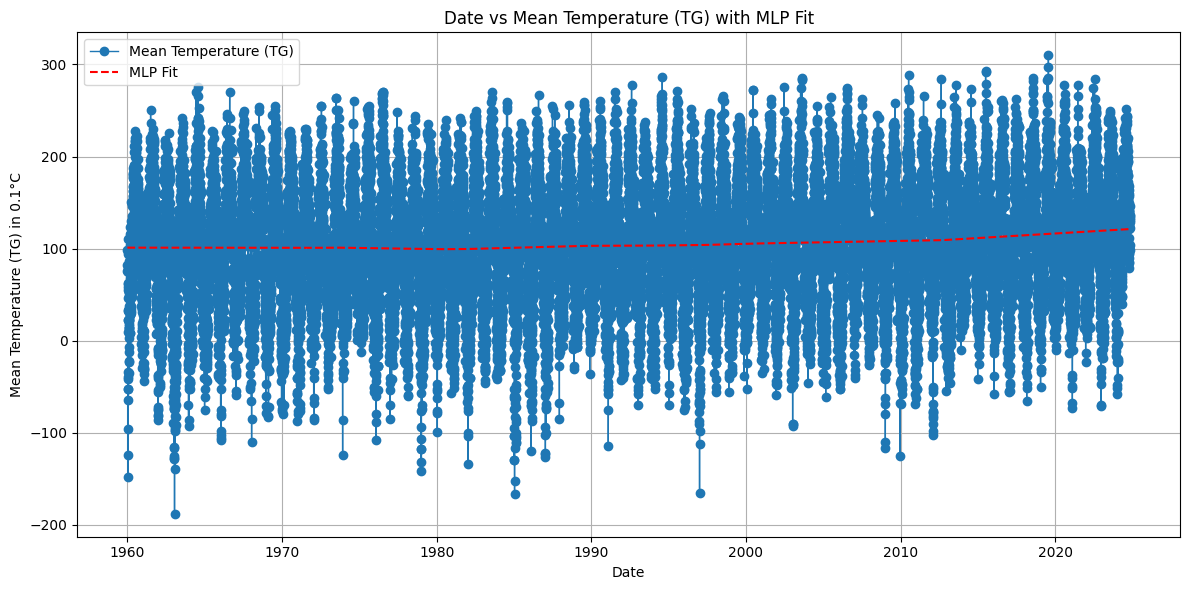

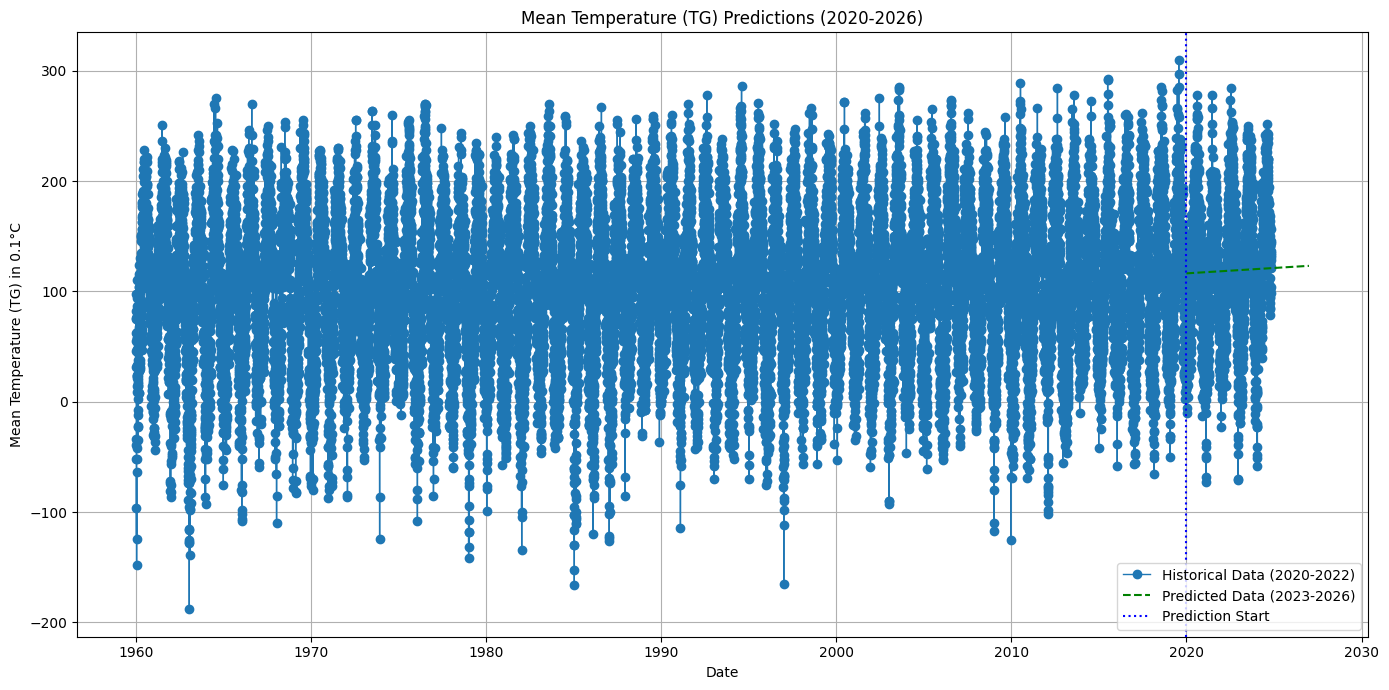

In [14]:
# Cell 1: Load Dataset and Read File
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

file_path = 'TG_SOUID121044.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

# Cell 2: Identify Data Start Index
data_start_index = next(i for i, line in enumerate(lines) if "SOUID" in line and "DATE" in line)

# Cell 3: Data Cleaning and Parsing
# Extracting only the data portion
data_lines = lines[data_start_index + 1:]

cleaned_data = []
for line in data_lines:
    # Split by commas and strip whitespace
    cleaned_line = [item.strip() for item in line.split(',')]
    # Append cleaned data if it matches the expected structure
    if len(cleaned_line) == 4:
        cleaned_data.append(cleaned_line)

columns = ["SOUID", "DATE", "TG", "Q_TG"]
data_df = pd.DataFrame(cleaned_data, columns=columns)

# Converting data types where necessary
data_df["TG"] = pd.to_numeric(data_df["TG"], errors='coerce')
data_df["Q_TG"] = pd.to_numeric(data_df["Q_TG"], errors='coerce')

# Cell 4: Data Filtering
filtered_data = data_df[data_df["Q_TG"] != 9]
filtered_data_after_2020 = filtered_data[filtered_data["DATE"].astype(int) > 19600000]
filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')

# Cell 5: Prepare Data for MLP Fitting
X = (filtered_data_after_2020["DATE"] - pd.Timestamp("2020-01-01")).dt.days.values.reshape(-1, 1)
y = filtered_data_after_2020["TG"].values

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=5000, random_state=42)
mlp.fit(X_scaled, y_scaled)

y_pred_scaled = mlp.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Cell 6: Visualization of Historical Data with MLP Fit
plt.figure(figsize=(12, 6))
plt.plot(filtered_data_after_2020["DATE"], filtered_data_after_2020["TG"], label='Mean Temperature (TG)', marker='o', linestyle='-', linewidth=1)
plt.plot(filtered_data_after_2020["DATE"], y_pred, label='MLP Fit', color='red', linestyle='--')
plt.title('Date vs Mean Temperature (TG) with MLP Fit')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (TG) in 0.1°C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Cell 7: Predict Future Values (2023-2026)
# Generate future dates for prediction
future_dates = pd.date_range(start="2020-01-01", end="2026-12-31")
X_future = (future_dates - pd.Timestamp("2020-01-01")).days.values.reshape(-1, 1)
X_future_scaled = scaler_X.transform(X_future)

# Predict future values
y_future_scaled = mlp.predict(X_future_scaled)
y_future = scaler_y.inverse_transform(y_future_scaled.reshape(-1, 1)).ravel()

# Combine historical and future data for unified visualization
plt.figure(figsize=(14, 7))
plt.plot(filtered_data_after_2020["DATE"], filtered_data_after_2020["TG"], label='Historical Data (2020-2022)', marker='o', linestyle='-', linewidth=1)
plt.plot(future_dates, y_future, label='Predicted Data (2023-2026)', color='green', linestyle='--')
plt.axvline(x=pd.Timestamp("2020-01-01"), color='blue', linestyle=':', label='Prediction Start')
plt.title('Mean Temperature (TG) Predictions (2020-2026)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (TG) in 0.1°C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/31/nj5p89nx2gg_nrh13dqr10y80000gn/T/ipykernel_2950/2408337483.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')


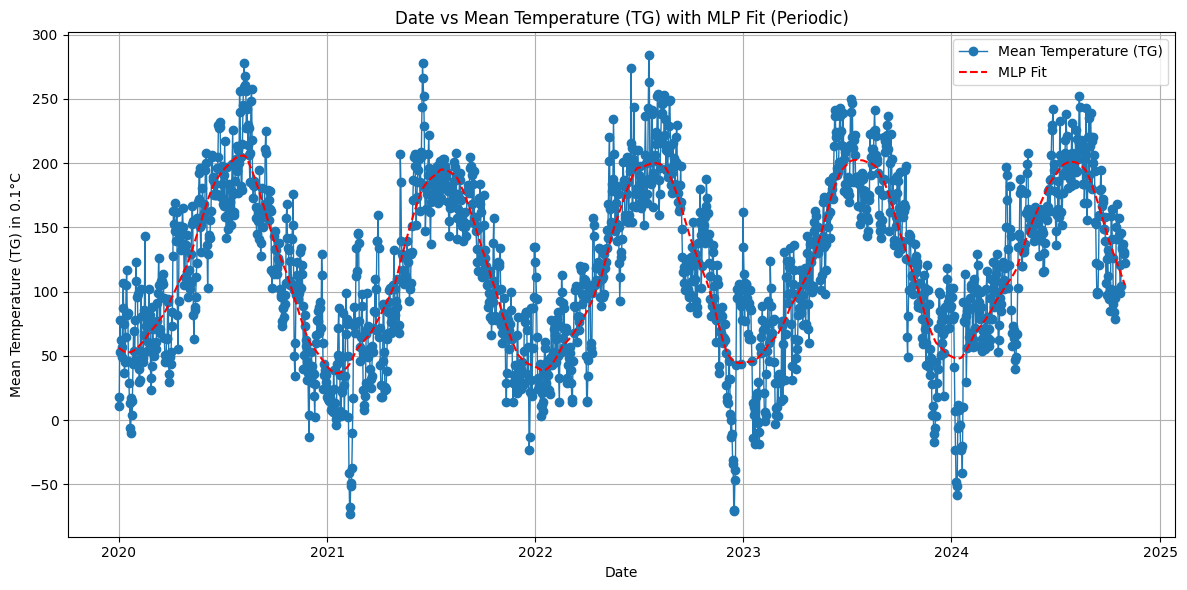

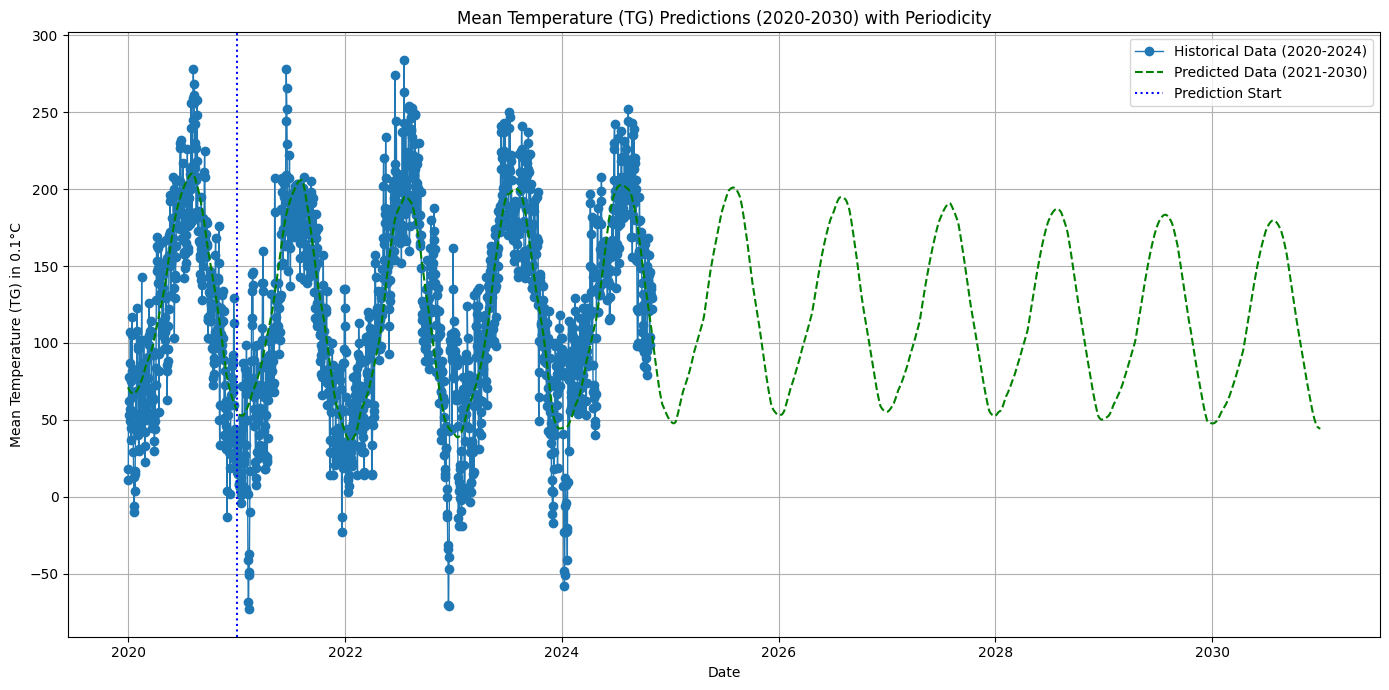

In [18]:
# Cell 1: Load Dataset and Read File
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

file_path = 'TG_SOUID121044.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

# Cell 2: Identify Data Start Index
data_start_index = next(i for i, line in enumerate(lines) if "SOUID" in line and "DATE" in line)

# Cell 3: Data Cleaning and Parsing
# Extracting only the data portion
data_lines = lines[data_start_index + 1:]

cleaned_data = []
for line in data_lines:
    # Split by commas and strip whitespace
    cleaned_line = [item.strip() for item in line.split(',')]
    # Append cleaned data if it matches the expected structure
    if len(cleaned_line) == 4:
        cleaned_data.append(cleaned_line)

columns = ["SOUID", "DATE", "TG", "Q_TG"]
data_df = pd.DataFrame(cleaned_data, columns=columns)

# Converting data types where necessary
data_df["TG"] = pd.to_numeric(data_df["TG"], errors='coerce')
data_df["Q_TG"] = pd.to_numeric(data_df["Q_TG"], errors='coerce')

# Cell 4: Data Filtering
filtered_data = data_df[data_df["Q_TG"] != 9]
filtered_data_after_2020 = filtered_data[filtered_data["DATE"].astype(int) > 20200000]
filtered_data_after_2020["DATE"] = pd.to_datetime(filtered_data_after_2020["DATE"], format='%Y%m%d')

# Cell 5: Prepare Data for MLP Fitting with Periodicity
X = (filtered_data_after_2020["DATE"] - pd.Timestamp("2020-01-01")).dt.days.values.reshape(-1, 1)
y = filtered_data_after_2020["TG"].values

# Adding sine and cosine transformations to capture periodicity
X_periodic = np.hstack([
    X,
    np.sin(2 * np.pi * X / 365.25),  # Annual cycle
    np.cos(2 * np.pi * X / 365.25)
])

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X_periodic)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=50000, random_state=42)
mlp.fit(X_scaled, y_scaled)

y_pred_scaled = mlp.predict(X_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Cell 6: Visualization of Historical Data with MLP Fit
plt.figure(figsize=(12, 6))
plt.plot(filtered_data_after_2020["DATE"], filtered_data_after_2020["TG"], label='Mean Temperature (TG)', marker='o', linestyle='-', linewidth=1)
plt.plot(filtered_data_after_2020["DATE"], y_pred, label='MLP Fit', color='red', linestyle='--')
plt.title('Date vs Mean Temperature (TG) with MLP Fit (Periodic)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (TG) in 0.1°C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Cell 7: Predict Future Values (2023-2026) with Periodicity
# Generate future dates for prediction
future_dates = pd.date_range(start="2020-01-01", end="2030-12-31")
X_future = (future_dates - pd.Timestamp("2021-01-01")).days.values.reshape(-1, 1)

# Adding sine and cosine transformations for future dates
X_future_periodic = np.hstack([
    X_future,
    np.sin(2 * np.pi * X_future / 365.25),
    np.cos(2 * np.pi * X_future / 365.25)
])
X_future_scaled = scaler_X.transform(X_future_periodic)

# Predict future values
y_future_scaled = mlp.predict(X_future_scaled)
y_future = scaler_y.inverse_transform(y_future_scaled.reshape(-1, 1)).ravel()

# Combine historical and future data for unified visualization
plt.figure(figsize=(14, 7))
plt.plot(filtered_data_after_2020["DATE"], filtered_data_after_2020["TG"], label='Historical Data (2020-2024)', marker='o', linestyle='-', linewidth=1)
plt.plot(future_dates, y_future, label='Predicted Data (2021-2030)', color='green', linestyle='--')
plt.axvline(x=pd.Timestamp("2021-01-01"), color='blue', linestyle=':', label='Prediction Start')
plt.title('Mean Temperature (TG) Predictions (2020-2030) with Periodicity')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (TG) in 0.1°C')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
